In [9]:
# import the necessary packages
# the imutils package is a collection of convenience functions
# to make basic image processing functions such as translation, rotation, resizing, skeletonization, and displaying Matplotlib images easier with OpenCV and both Python 2.7 and Python 3
import skimage.io as io
from imutils import paths
from skimage.feature import local_binary_pattern
from skimage.feature import hog
import numpy as np
from skimage import exposure
from skimage import feature
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import argparse
import cv2
import csv
import os
# for io.imshow we need to import it from skimage
# the syntax is import skimage.io as io
# linearsvc is a linear support vector machine and needs to be imported from sklearn.svm
# the syntax is from sklearn.svm import LinearSVC
# labelencoder is a label encoder and needs to be imported from sklearn.preprocessing
# the syntax is from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
# import sklearn.svm.SVC
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
# for pickle we need to import it from sklearn.externals
# the syntax for pickle is import pickle
import pickle
import pandas as pd
import sys
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
# first we will try SIFT
def sift(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # detect keypoints in the image
    descriptor = cv2.xfeatures2d.SIFT_create()
    (kps, features) = descriptor.detectAndCompute(image, None)
    # convert the keypoints from KeyPoint objects to NumPy
    # arrays
    kps = np.float32([kp.pt for kp in kps])
    # return a tuple of keypoints and features
    return (kps, features)

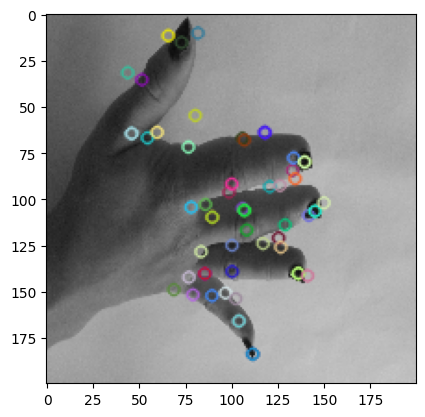

In [13]:
# perform SIFT feature extraction
def sift_feature_extraction():
    for i in range(0, 6):
        try:
            os.remove("_SIFTFeatures_m_" + str(i) + ".csv")
        except OSError:
            pass
        try:
            os.remove("_SIFTFeatures_w_" + str(i) + ".csv")
        except OSError:
            pass

    f0_m = open("_SIFTFeatures_m_0.csv", "a", newline='')
    f1_m = open("_SIFTFeatures_m_1.csv", "a", newline='')
    f2_m = open("_SIFTFeatures_m_2.csv", "a", newline='')
    f3_m = open("_SIFTFeatures_m_3.csv", "a", newline='')
    f4_m = open("_SIFTFeatures_m_4.csv", "a", newline='')
    f5_m = open("_SIFTFeatures_m_5.csv", "a", newline='')

    f0_w = open("_SIFTFeatures_w_0.csv", "a", newline='')
    f1_w = open("_SIFTFeatures_w_1.csv", "a", newline='')
    f2_w = open("_SIFTFeatures_w_2.csv", "a", newline='')
    f3_w = open("_SIFTFeatures_w_3.csv", "a", newline='')
    f4_w = open("_SIFTFeatures_w_4.csv", "a", newline='')
    f5_w = open("_SIFTFeatures_w_5.csv", "a", newline='')

    f_m = [f0_m , f1_m, f2_m, f3_m, f4_m, f5_m]
    f_w = [f0_w , f1_w, f2_w, f3_w, f4_w, f5_w]

    for imagePath in paths.list_images("dataset/Woman"):
        # extract the label from the image path
        label = imagePath.split(os.path.sep)[-2]
        
        # load the image, convert it to grayscale, and detect
        # edges in it
        image = cv2.imread(imagePath)
        org_image = cv2.imread(imagePath)
        
        # extract Histogram of Oriented Gradients from the
        # test image
        # display the original image
        # if the image exists, display it and count the number of images
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (200, 200))
            org_image = cv2.resize(org_image, (200, 200))
            # detect keypoints in the image
            sift = cv2.SIFT_create()
            kps = sift.detect(image, None)
            #descriptor = cv2.xfeatures2d.SIFT_create()
            #(kps, features) = descriptor.detectAndCompute(image, None)
            # convert the keypoints from KeyPoint objects to NumPy arrays
            img = cv2.drawKeypoints(image,kps,org_image)
            plt.imshow(img)
            kps = np.float32([kp.pt for kp in kps])
            csv.writer(f_w[(int)(label)]).writerow([label, kps])

    for imagePath in paths.list_images("dataset/men"):
        # extract the label from the image path
        label = imagePath.split(os.path.sep)[-2]
        
        # load the image, convert it to grayscale, and detect
        # edges in it
        image = cv2.imread(imagePath)
        
        # extract Histogram of Oriented Gradients from the
        # test image
        # display the original image
        # if the image exists, display it and count the number of images
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (200, 200))
            # detect keypoints in the image
            sift = cv2.SIFT_create()
            kps = sift.detect(image, None)
            #descriptor = cv2.xfeatures2d.SIFT_create()
            #(kps, features) = descriptor.detectAndCompute(image, None)
            # convert the keypoints from KeyPoint objects to NumPy arrays
            kps = np.float32([kp.pt for kp in kps])
            csv.writer(f_m[(int)(label)]).writerow([label, kps])
        
    for file in f_w:
        file.close()
    for file in f_m:
        file.close()

sift_feature_extraction()

In [48]:
content = pd.read_csv("SIFTFeatures_m_" + str(0) + ".csv", header=None, skiprows = 0, nrows= 80, sep=',')
content = np.array(content)
content = content[0,1]
content = content.replace("\n", "").replace("[[", "").replace("]]", "").replace("[ ", "[").replace(" ]", "]" )
content = content.split("] [")
content = np.array(content)
if(content.__contains__('')):
    content = np.delete(content, np.where(content == ''))

content_new = []
for c in content:
    c = c.split(" ")
    c = np.array(c)
    if(c.__contains__('')):
        c = np.delete(c, np.where(c == ''), axis=0)
    c = np.array(c, dtype= np.float32)
    content_new.append(c)

print(content_new[0])


[58.671886 53.839962]


In [ ]:
def train_model_sift():
    k = 0
    #model = SVC(random_state=42) # ramdom state is used to get the same results each time. It means that the model will be trained on the same data each time
    model = SVC(kernel='rbf', gamma=0.01, C=1000) # rbf means that the model will use the gaussian kernel as it stands for radial basis function
    for m in range (3):
        data = []
        labels = []
        for i in range (0, 6):
            try:
                labels_data = pd.read_csv("hogFeatures_m_" + str(i) + ".csv", header=None, skiprows = k, nrows= 80, sep=',')
            except:
                labels_data = []
                pass
            data_temp = np.array(labels_data)
            for j in range (len(labels_data)):
                temp = data_temp[j, 1].replace("[", "")
                temp = temp.replace("\n", "")
                temp = temp.replace("]", "")
                temp= temp.split(" ")
                temp = np.array(temp)
                if(temp.__contains__('')):
                    temp = np.delete(temp, np.where(temp == ''))
                data.append(np.array(temp, dtype=np.float32))
                labels.append(labels_data.iloc[j, 0])

            try:
                labels_data = pd.read_csv("hogFeatures_w_" + str(i) + ".csv", header=None, skiprows = k, nrows= 80, sep=',')
            except:
                labels_data = []
                pass
            data_temp = np.array(labels_data)
            for j in range (len(labels_data)):
                temp = data_temp[j, 1].replace("[", "")
                temp = temp.replace("\n", "")
                temp = temp.replace("]", "")
                temp= temp.split(" ")
                temp = np.array(temp)
                if(temp.__contains__('')):
                    temp = np.delete(temp, np.where(temp == ''))
                #print(data_temp)
                data.append(np.array(temp, dtype=np.float32))
                labels.append(labels_data.iloc[j, 0])
        
        k += 81
        data = np.array(data, dtype="float")
        labels = LabelEncoder().fit_transform(labels)
        # # partition the data into training and testing splits, using 75%
        trainingData, testData, trainingLabels, testLabels = train_test_split(data, labels, test_size=0.25, random_state=42)
        

        print("[INFO] evaluating...", flush=True)
        
        # train the model
        # how to continue to train SVM based on the previous model
        # this is done by using the partial_fit method
        # syntax: model.partial_fit(trainingData, trainingLabels)
        model.fit(trainingData, trainingLabels)

        # evaluate the model and update the accuracies list
        acc = model.score(testData, testLabels)
        print("[INFO] accuracy: {:.2f}%".format(acc * 100), flush=True)
        # dump the classifier to file
        print("[INFO] dumping classifier to file...", flush=True)
        f = open("SVM_classifier" + str(i) + ".pkl", "wb") # wb = write binary
        f.write(pickle.dumps(model))
        f.close()

train_model_sift()

In [ ]:
# use hog implemented in skimage.feature
def get_hog():
    # get images from images array, convert to grayscale
    # and resize to 200x200
    
    # remove the files if exist
    for i in range(0, 6):
        try:
            os.remove("hogFeatures_m_" + str(i) + ".csv")
        except OSError:
            pass
        try:
            os.remove("hogFeatures_w_" + str(i) + ".csv")
        except OSError:
            pass

    f0_m = open("hogFeatures_m_0.csv", "a", newline='')
    f1_m = open("hogFeatures_m_1.csv", "a", newline='')
    f2_m = open("hogFeatures_m_2.csv", "a", newline='')
    f3_m = open("hogFeatures_m_3.csv", "a", newline='')
    f4_m = open("hogFeatures_m_4.csv", "a", newline='')
    f5_m = open("hogFeatures_m_5.csv", "a", newline='')

    f0_w = open("hogFeatures_w_0.csv", "a", newline='')
    f1_w = open("hogFeatures_w_1.csv", "a", newline='')
    f2_w = open("hogFeatures_w_2.csv", "a", newline='')
    f3_w = open("hogFeatures_w_3.csv", "a", newline='')
    f4_w = open("hogFeatures_w_4.csv", "a", newline='')
    f5_w = open("hogFeatures_w_5.csv", "a", newline='')

    f_m = [f0_m , f1_m, f2_m, f3_m, f4_m, f5_m]
    f_w = [f0_w , f1_w, f2_w, f3_w, f4_w, f5_w]

    for imagePath in paths.list_images("dataset/Woman"):
        # extract the label from the image path
        label = imagePath.split(os.path.sep)[-2]
        
        # load the image, convert it to grayscale, and detect
        # edges in it
        image = cv2.imread(imagePath)
        
        # extract Histogram of Oriented Gradients from the
        # test image
        # display the original image
        # if the image exists, display it and count the number of images
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (200, 200))
            (H, hogImage) = feature.hog(image, orientations=15, pixels_per_cell=(10, 10), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1", visualize=True, feature_vector=True)
            csv.writer(f_w[(int)(label)]).writerow([label, H])

    for imagePath in paths.list_images("dataset/men"):
        # extract the label from the image path
        label = imagePath.split(os.path.sep)[-2]
        
        # load the image, convert it to grayscale, and detect
        # edges in it
        image = cv2.imread(imagePath)
        
        # extract Histogram of Oriented Gradients from the
        # test image
        # display the original image
        # if the image exists, display it and count the number of images
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (200, 200))
            (H, hogImage) = feature.hog(image, orientations=15, pixels_per_cell=(10, 10), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1", visualize=True, feature_vector=True)
            csv.writer(f_m[(int)(label)]).writerow([label, H])
        
    for file in f_w:
        file.close()
    for file in f_m:
        file.close()

#get_hog()

In [ ]:
labels_data = pd.read_csv("hogFeatures_m_" + str(0) + ".csv", header=None, skiprows = 171, nrows= 1000, sep=',')
print(len(labels_data))

In [49]:

# encode the labels, converting them from strings to integers
# the LabelEncoder class is used to normalize labels

# read the labels and data from the csv files and store them in data and labels
# read only 80 row from each file in each iteration to avoid memory error
# in each iteration we will run train_test_split on the data and labels
# and train the model on the training data and test it on the test data
# and store the accuracy in the accuracies array
# at the end we will print the average accuracy

def train_model():
    k = 0
    #model = SVC(random_state=42) # ramdom state is used to get the same results each time. It means that the model will be trained on the same data each time
    model = SVC(kernel='rbf', gamma=0.01, C=10) # rbf means that the model will use the gaussian kernel as it stands for radial basis function
    for m in range (3):
        data = []
        labels = []
        for i in range (0, 6):
            try:
                labels_data = pd.read_csv("hogFeatures_m_" + str(i) + ".csv", header=None, skiprows = k, nrows= 80, sep=',')
            except:
                labels_data = []
                pass
            data_temp = np.array(labels_data)
            for j in range (len(labels_data)):
                temp = data_temp[j, 1].replace("[", "")
                temp = temp.replace("\n", "")
                temp = temp.replace("]", "")
                temp= temp.split(" ")
                temp = np.array(temp)
                if(temp.__contains__('')):
                    temp = np.delete(temp, np.where(temp == ''))
                data.append(np.array(temp, dtype=np.float32))
                labels.append(labels_data.iloc[j, 0])

            try:
                labels_data = pd.read_csv("hogFeatures_w_" + str(i) + ".csv", header=None, skiprows = k, nrows= 80, sep=',')
            except:
                labels_data = []
                pass
            data_temp = np.array(labels_data)
            for j in range (len(labels_data)):
                temp = data_temp[j, 1].replace("[", "")
                temp = temp.replace("\n", "")
                temp = temp.replace("]", "")
                temp= temp.split(" ")
                temp = np.array(temp)
                if(temp.__contains__('')):
                    temp = np.delete(temp, np.where(temp == ''))
                #print(data_temp)
                data.append(np.array(temp, dtype=np.float32))
                labels.append(labels_data.iloc[j, 0])
        
        k += 81
        data = np.array(data, dtype="float")
        labels = LabelEncoder().fit_transform(labels)
        # # partition the data into training and testing splits, using 75%
        trainingData, testData, trainingLabels, testLabels = train_test_split(data, labels, test_size=0.25, random_state=42)
        

        print("[INFO] evaluating...", flush=True)
        
        # train the model
        # how to continue to train SVM based on the previous model
        # this is done by using the partial_fit method
        # syntax: model.partial_fit(trainingData, trainingLabels)
        model.fit(trainingData, trainingLabels)

        # evaluate the model and update the accuracies list
        acc = model.score(testData, testLabels)
        print("[INFO] accuracy: {:.2f}%".format(acc * 100), flush=True)
        # dump the classifier to file
        print("[INFO] dumping classifier to file...", flush=True)
        f = open("SVM_classifier" + str(i) + ".pkl", "wb") # wb = write binary
        f.write(pickle.dumps(model))
        f.close()

train_model()


[INFO] evaluating...
[INFO] accuracy: 67.92%
[INFO] dumping classifier to file...
[INFO] evaluating...
[INFO] accuracy: 56.25%
[INFO] dumping classifier to file...
[INFO] evaluating...
[INFO] accuracy: 36.84%
[INFO] dumping classifier to file...
